In [ ]:
#import several libraries that may be needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Enter the CSV file path by clicking the three dots next to the file, then copy the path
#xls = pd.ExcelFile('/content/Data Model - Pizza Sales.xlsx')
#read_file = pd.read_excel (xls,"pizza_sales")
#export file menjadi csv
#df = read_file.to_csv (r'/content/Data Model - Pizza Sales.csv', index = None, header=True)

In [ ]:
df = pd.read_csv('/content/Data Model - Pizza Sales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
#see the total data types in the dataframe
df.dtypes.value_counts()

object     7
int64      3
float64    2
dtype: int64

In [ ]:
#see the total 'unique' value in each column
df.nunique().sort_values()

quantity                 4
pizza_category           4
pizza_size               5
unit_price              25
pizza_ingredients       32
pizza_name              32
total_price             56
pizza_id                91
order_date             358
order_time           16382
order_id             21350
order_details_id     48620
dtype: int64

In [ ]:
df.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
len(df)

48620

In [ ]:
#df.shape
#df.columns

In [ ]:
#see if there is data that is still null
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
#see if there is data that still has 'na/NaN' value
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
#check for undetected missing values by filling all blank spaces with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
pd.isnull(df).head() #If theres a null value, then it will be assigned a value of True in the output object.

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


So theres no NULL or NaN value then this data is clean and can be used

In [ ]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


It can be seen that in the order_details_id column there are 48620 unique values, which means that this column contains details of the number of orders from the first order to 48620.

To make it more convenient for us to remember, the pizza_id column can be replaced with pizza_name_id to represent each ID for the name of the pizza purchased in 2015. (This part is not always necessary)

In [ ]:
df = df.rename(columns = {"pizza_id": "pizza_name_id"})

In [ ]:
df.head(5)

,order_details_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


No transformation data is used because for the rest it is correct. The order_date and order_time parts are kept separate because they can be used to represent two different things

But there is also nothing wrong if the two columns are combined and then the data type is changed to datetime with merge columns

In [ ]:
#Merge Date and Time column
df['order_datetime']=df['order_date'] +" "+ df['order_time']

#Change Date time column type
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

In [ ]:
#delete column
#df = df.drop(columns=["Order Date Time"], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  object        
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  order_datetime     48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory 

Sekarang coba untuk melihat karakteristik dari setiap data

In [ ]:
#Check unique values from several columns
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [ ]:
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [ ]:
df['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [ ]:
df['pizza_name'].nunique()

32

In [ ]:
#because pizza ingredients contain more than one ingredient separated by commas, we will try to keep looking at them one by one

pizza_ingredients_unique = []

for x in df['pizza_ingredients']:
  for y in x.split(", "):
    pizza_ingredients_unique.append(y)

pizza_ingredients_unique = list(set(pizza_ingredients_unique))
pizza_ingredients_unique

['Zucchini',
 'Chicken',
 'Brie Carre Cheese',
 'Mushrooms',
 'Calabrese Salami',
 'Kalamata Olives',
 'Pepperoni',
 'Capocollo',
 'Artichokes',
 'Barbecued Chicken',
 'Anchovies',
 '慛duja Salami',
 'Mozzarella Cheese',
 'Romano Cheese',
 'Chipotle Sauce',
 'Asiago Cheese',
 'Gorgonzola Piccante Cheese',
 'Blue Cheese',
 'Soppressata Salami',
 'Cilantro',
 'Provolone Cheese',
 'Spinach',
 'Thai Sweet Chilli Sauce',
 'Thyme',
 'Garlic',
 'Green Olives',
 'Coarse Sicilian Salami',
 'Pancetta',
 'Genoa Salami',
 'Barbecue Sauce',
 'Feta Cheese',
 'Luganega Sausage',
 'Pears',
 'Artichoke',
 'Green Peppers',
 'Smoked Gouda Cheese',
 'Bacon',
 'Beef Chuck Roast',
 'Onions',
 'Tomatoes',
 'Corn',
 'Arugula',
 'Red Peppers',
 'Gouda Cheese',
 'Friggitello Peppers',
 'Pineapple',
 'Ricotta Cheese',
 'Italian Sausage',
 'Parmigiano Reggiano Cheese',
 'Chorizo Sausage',
 'Sliced Ham',
 'Sun-dried Tomatoes',
 'Goat Cheese',
 'Peperoncini verdi',
 'Jalapeno Peppers',
 'Caramelized Onions',
 'Orega

In [ ]:
len(pizza_ingredients_unique)

65

In [ ]:
#df.pizza_ingredients.value_counts()

In [ ]:
df['order_date']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
48615    2015-12-31
48616    2015-12-31
48617    2015-12-31
48618    2015-12-31
48619    2015-12-31
Name: order_date, Length: 48620, dtype: object

Performs some processing on features (Feature Engineering)

- Order Date

In [ ]:
#Extracting year from 'order_date' column
df['year'] = pd.DatetimeIndex(df['order_date']).year

In [ ]:
#Extracting month from 'order_date' column
df['month'] = pd.DatetimeIndex(df['order_date']).month_name()

In [ ]:
#Extracting weekday from 'order_date' column
df['weekday'] = pd.DatetimeIndex(df['order_date']).day_name()

In [ ]:
#Extracting date from 'order_date' column
df['date'] = pd.to_datetime(df['order_date']).dt.date

- Order time

In [ ]:
#Extracting hour from 'order_time' column
df['order_time']=df['order_time'].astype('string')
df[['order_hour','order_minute', 'order_second']]= df['order_time'].str.split(":",expand=True)
df["order_hour"].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: order_hour, dtype: Int64

In [ ]:
df.head(5)

,order_details_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,year,month,weekday,date,Hour,Minute,Second,order_hour,order_minute,order_second
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,...,2015,January,Thursday,2015-01-01,11,38,36,11,38,36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,...,2015,January,Thursday,2015-01-01,11,57,40,11,57,40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,...,2015,January,Thursday,2015-01-01,11,57,40,11,57,40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,...,2015,January,Thursday,2015-01-01,11,57,40,11,57,40
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,...,2015,January,Thursday,2015-01-01,11,57,40,11,57,40


In [ ]:
#df = df.drop(columns=["order_hour", "order_hour_minute"], axis = 1)

Exploratory Data Analysis

- What days and times do we tend to be busiest?

In [ ]:
df['weekday'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: weekday, dtype: int64

In [ ]:
##another way to check
##df['order_dates'] = pd.DatetimeIndex(df['order_date']).day_name()
##df['order_dates'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_dates, dtype: int64

In [ ]:
##another way to check
##df['order_dates'] = df['order_datetime'].dt.day_name() #since order_datetime already in datetime value
##df['order_dates'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_dates, dtype: int64

In [ ]:
df['month'].value_counts()

July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: month, dtype: int64

In [1]:
#month vs orders recevied on that given month

#plt.figure(figsize=(8,4), dpi=300)
#df['month'].value_counts().sort_values(ascending=False).plot(kind='bar')
#plt.xticks(rotation=90)
#plt.xlabel("month")
#plt.ylabel("Orders Received")
#plt.title("month vs. Orders Received")
#plt.show();

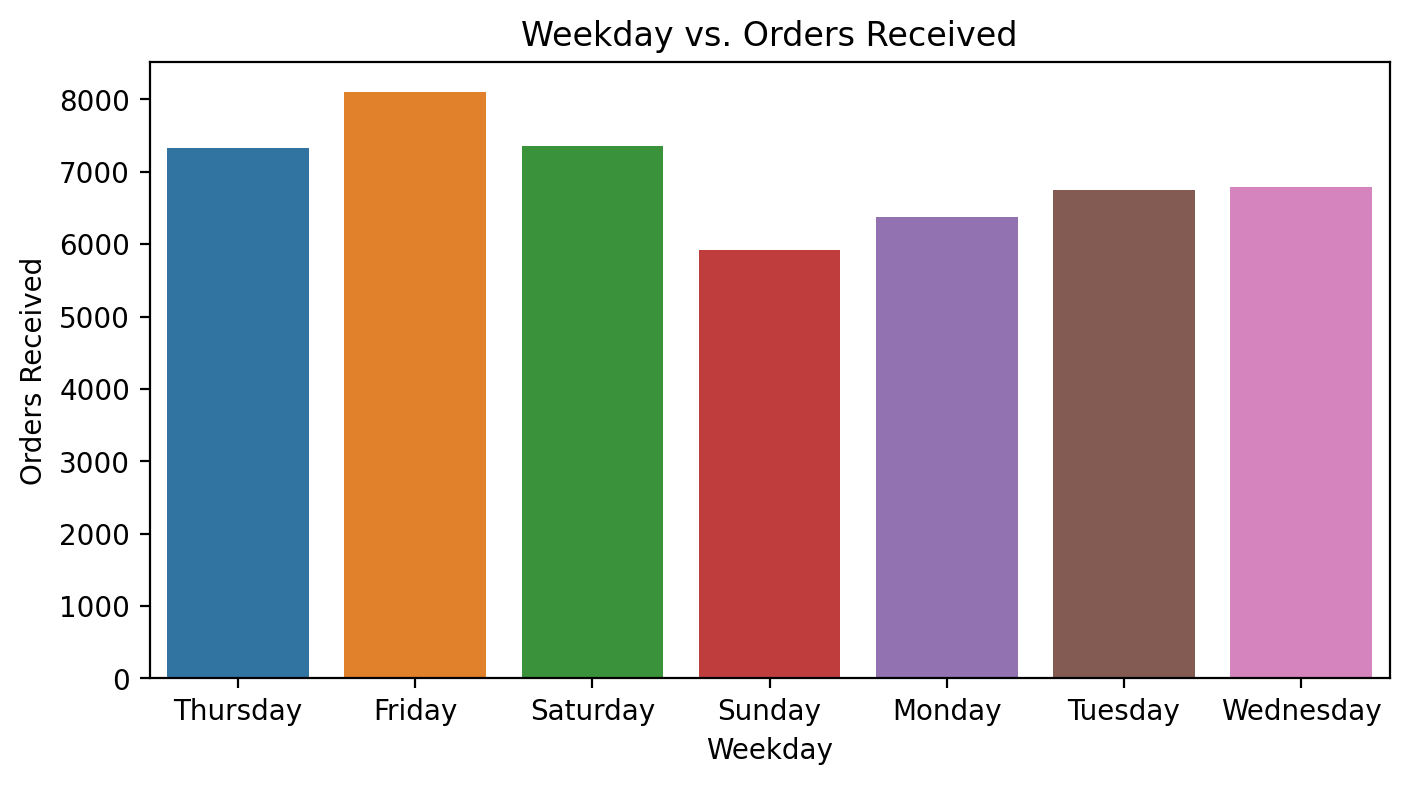

In [ ]:
#Weekday vs orders recevied on that given weekday

plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=df, x='weekday')
plt.xlabel("Weekday")
plt.ylabel("Orders Received")
plt.title("Weekday vs. Orders Received")
plt.show();

**--> 'Friday' tends to be busiest weekday followed by Saturday and Thursday**

In [ ]:
#Hour vs Orders Received of that given weekday
df['order_hour'].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: order_hour, dtype: Int64

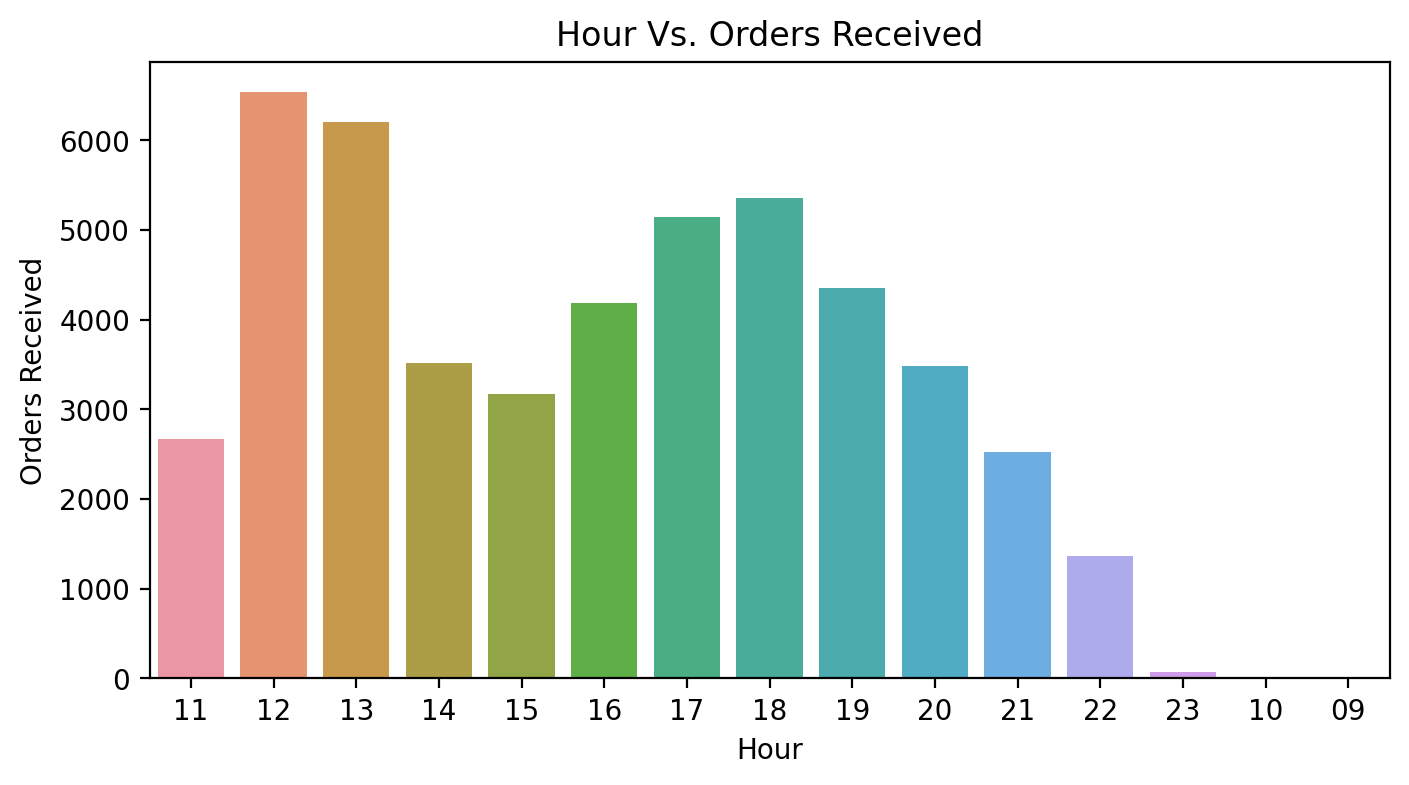

In [ ]:
#Hour vs. Orders Received on that given weekday
plt.figure(figsize=(8,4) ,dpi=200)
sns.countplot(data=df, x='order_hour')
plt.xlabel("Hour")
plt.ylabel("Orders Received")
plt.title("Hour Vs. Orders Received")
plt.show();

In [ ]:
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_year'].value_counts()

2015    48620
Name: order_year, dtype: int64

--> at 12:00 PM bein peak point of orders received.
We can conclude that orders are good between 12:00 PM to 02:00 PM

- How many pizzas are we making during peak periods?

In [ ]:
#Hour vs. count of sales

df.groupby(['order_hour'])['quantity'].sum().sort_values(ascending=False)

order_hour
12    6776
13    6413
18    5417
17    5211
19    4406
16    4239
14    3613
20    3534
15    3216
11    2728
21    2545
22    1386
23      68
10      18
09       4
Name: quantity, dtype: int64

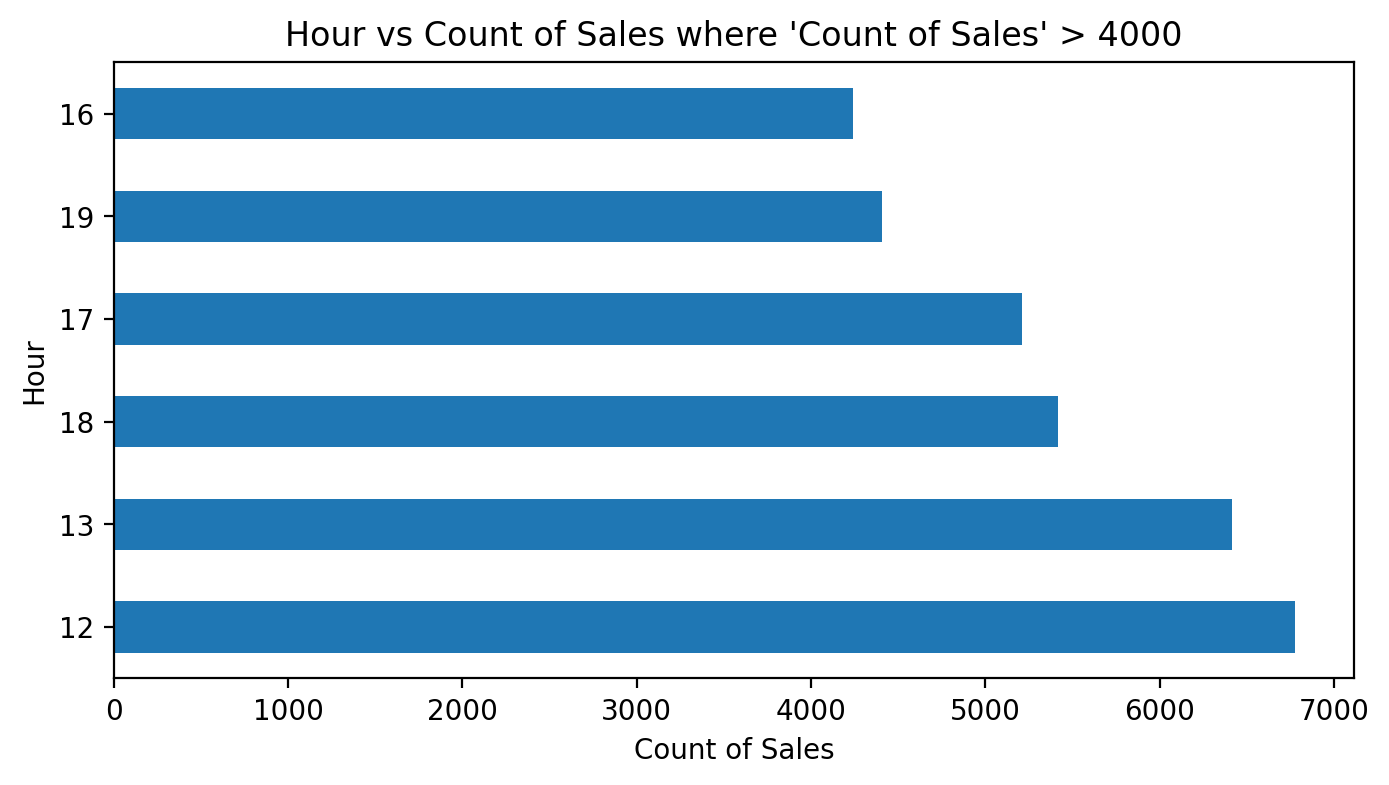

In [ ]:
#Hours where 'Count of sales' > 4000 (Peak periods)
plt.figure(figsize=(8,4), dpi=200)
df.groupby(['order_hour'])['quantity'].sum().sort_values(ascending=False)[:6].plot(kind='barh')
plt.xlabel("Count of Sales")
plt.ylabel("Hour")
plt.title("Hour vs Count of Sales where 'Count of Sales' > 4000")
plt.show()

In [ ]:
#Using hours where 'Count of sales' > 4000 (Peak periods) to calculate total quantity of pizzas sold in peak hours

df.groupby(['order_hour'])['quantity'].sum().sort_values(ascending=False)[:6].sum()

32462

--> 32, 462 pizzas being made in peak hours (12:00 PM, 01:00 PM, 04:00 PM - 07:00 PM)

- What are our best and worst-selling pizzas?

In [ ]:
#Count of sales for all types of pizza

df.groupby(['pizza_name'])['quantity'].sum().sort_values(ascending=False)

pizza_name
The Classic Deluxe Pizza                      2453
The Barbecue Chicken Pizza                    2432
The Hawaiian Pizza                            2422
The Pepperoni Pizza                           2418
The Thai Chicken Pizza                        2371
The California Chicken Pizza                  2370
The Sicilian Pizza                            1938
The Spicy Italian Pizza                       1924
The Southwest Chicken Pizza                   1917
The Big Meat Pizza                            1914
The Four Cheese Pizza                         1902
The Italian Supreme Pizza                     1884
The Vegetables + Vegetables Pizza             1526
The Mexicana Pizza                            1484
The Napolitana Pizza                          1464
The Prosciutto and Arugula Pizza              1457
The Spinach and Feta Pizza                    1446
The Pepper Salami Pizza                       1446
The Italian Capocollo Pizza                   1438
The Greek Pizza     

In [ ]:
#Count of Sales for Top-3 best selling pizza

df.groupby(['pizza_name'])['quantity'].sum().sort_values(ascending=False)[:3]

pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
Name: quantity, dtype: int64

In [ ]:
#Count of sales for least-3 selling pizza

df.groupby(['pizza_name'])['quantity'].sum().sort_values(ascending=False)[::-1].head(3)

pizza_name
The Brie Carre Pizza       490
The Mediterranean Pizza    934
The Calabrese Pizza        937
Name: quantity, dtype: int64

--> 'The Classic Deluxe Pizza' is the best selling pizza and 'The Brie Carre Pizza' is the worst selling pizza

- Whats our average unit per price?

In [ ]:
round(df['unit_price'].mean(),2)

16.49

--> '$16.49' is the 'Average Unit Price' for all the pizzas sold

- Whats our average order value?

In [ ]:
round(df['total_price'].mean(),2)

16.82

--> '$16.82' is the 'Average Order Value' for all the pizzas sold

- Whats our highest order value?

In [ ]:
round(df['total_price'].max(),2)

83.0

--> '$83.0' is the 'Highest Order Value' across all the pizzas sold

- Whats our lowest order value?

In [ ]:
round(df['total_price'].min(),2)

9.75

--> '$9.75' is the 'Lower Order Value' across all the pizzas sold

- What size of pizza is sold more?

In [ ]:
df.groupby(['pizza_size'])['quantity'].sum().sort_values(ascending=False)

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

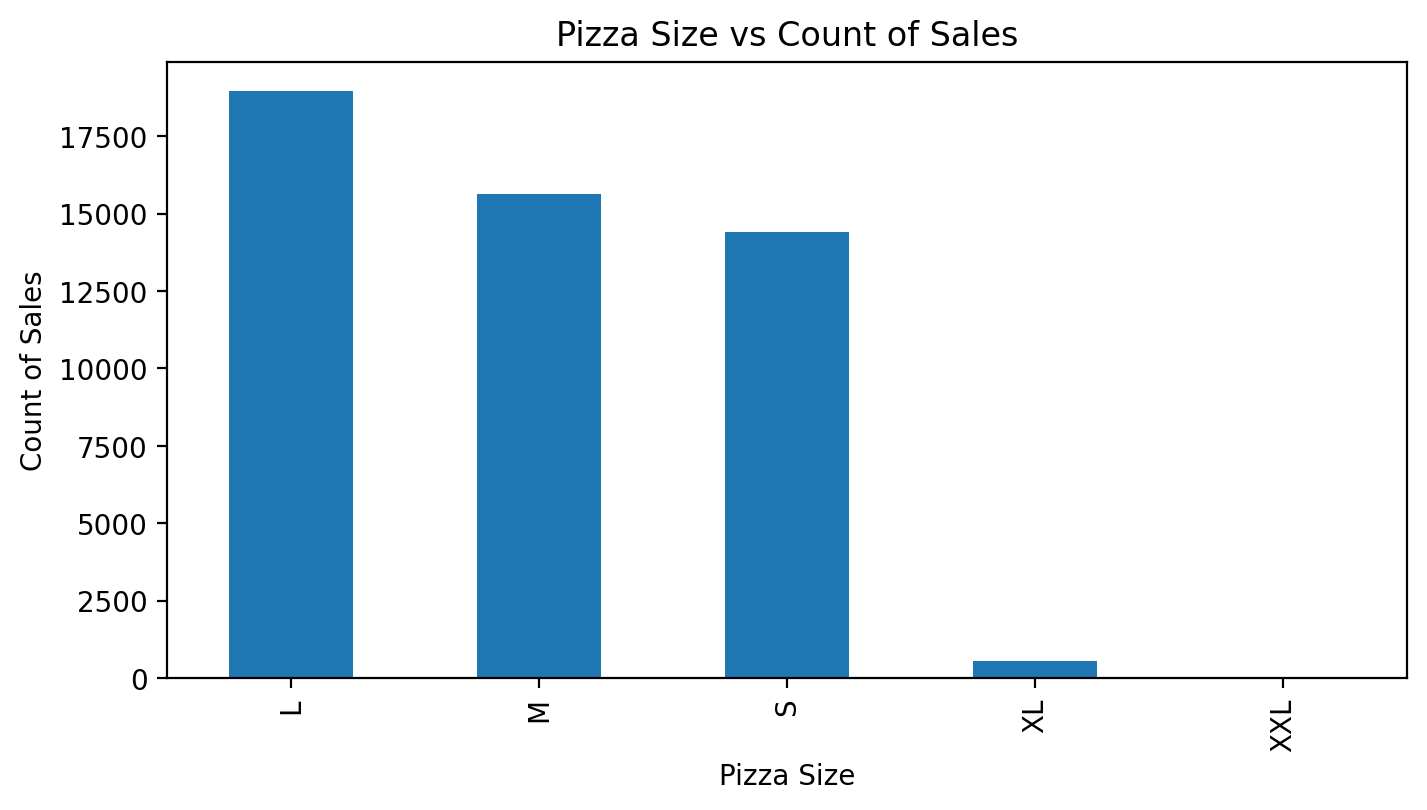

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
df.groupby(['pizza_size'])['quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Pizza Size")
plt.ylabel("Count of Sales")
plt.title("Pizza Size vs Count of Sales")
plt.show();

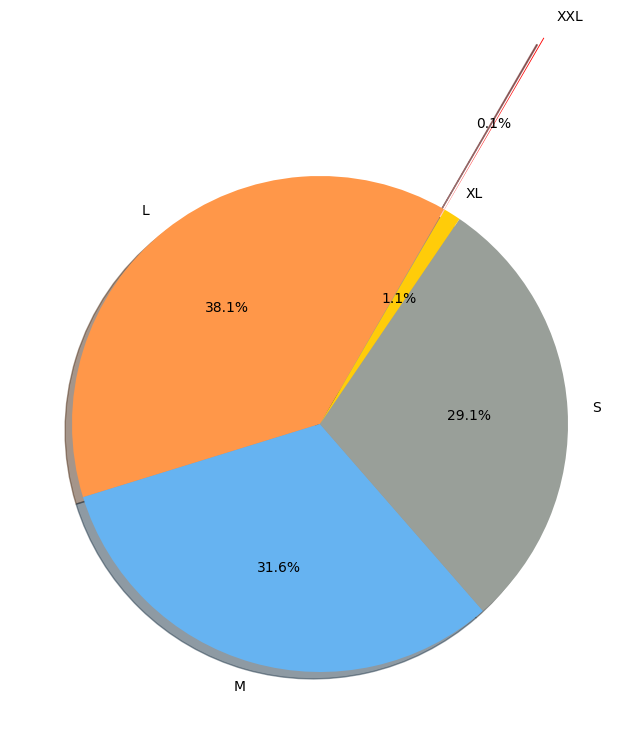

In [ ]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

- What category of pizza is sold more?

In [ ]:
df.groupby(['pizza_category'])['quantity'].sum().sort_values(ascending=False)

pizza_category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

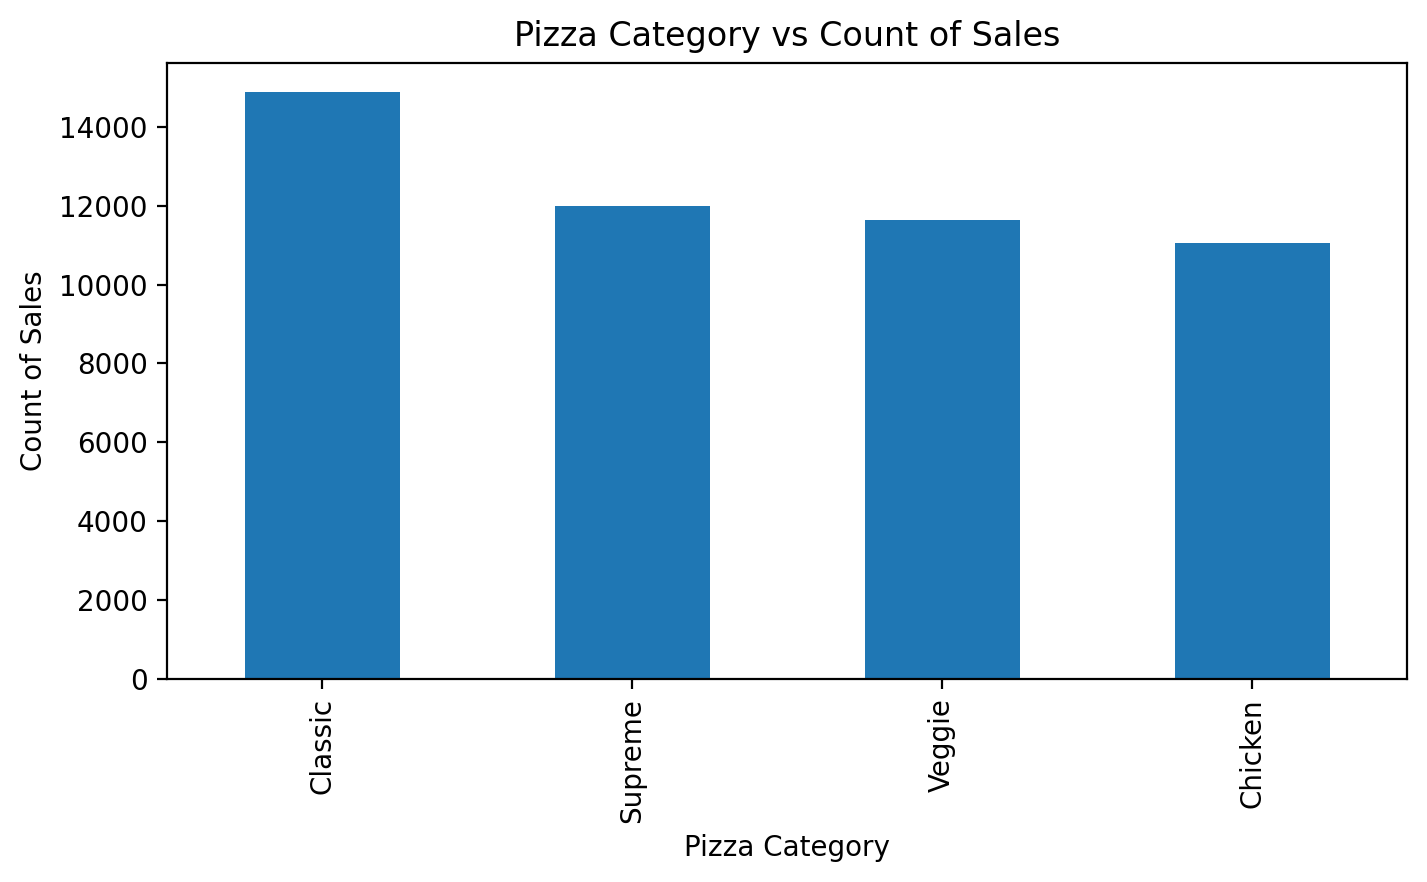

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
df.groupby(['pizza_category'])['quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Pizza Category")
plt.ylabel("Count of Sales")
plt.title("Pizza Category vs Count of Sales")
plt.show();

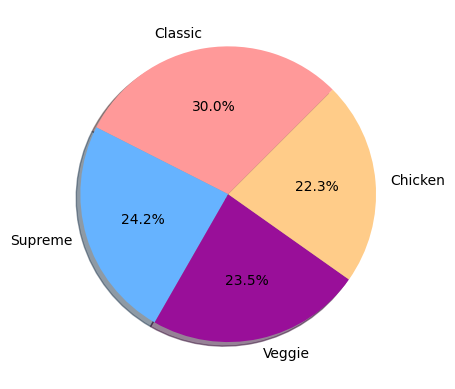

In [ ]:
labels = df.groupby(['pizza_category'])['quantity'].sum().sort_values(ascending=False).index
sizes = df.groupby(['pizza_category'])['quantity'].sum().sort_values(ascending=False)
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

- Which month has highest sale of pizzas?

In [ ]:
df.groupby(['month'])['quantity'].sum().sort_values(ascending=False)

month
July         4392
May          4328
November     4266
March        4261
January      4232
August       4168
April        4151
June         4107
February     3961
December     3935
September    3890
October      3883
Name: quantity, dtype: int64

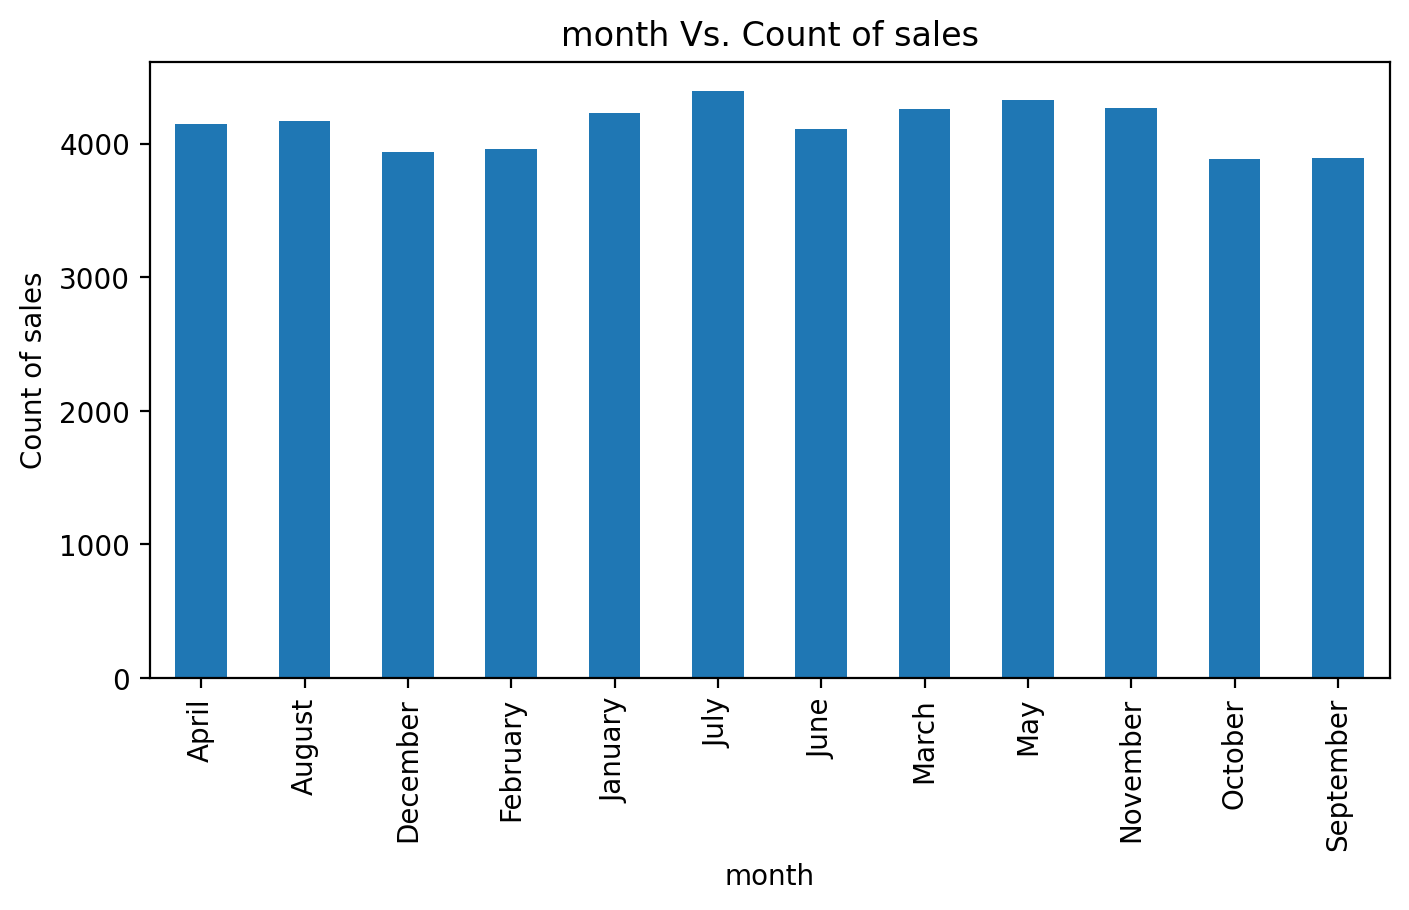

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
df.groupby(['month'])['quantity'].sum().plot(kind='bar')
plt.xlabel("month")
plt.ylabel("Count of sales")
plt.title("month Vs. Count of sales")
plt.show();

- Pizza count for individual orders?

In [ ]:
df['quantity'].value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

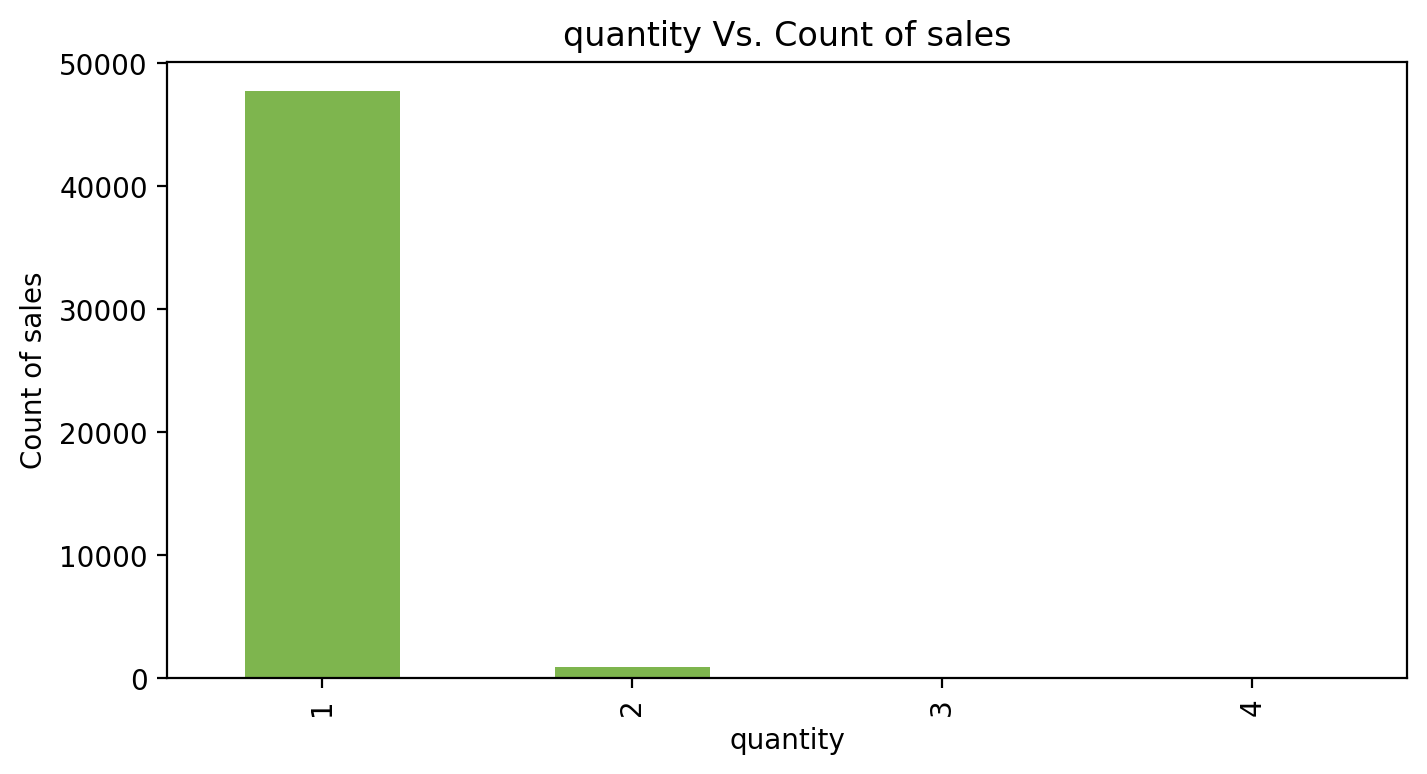

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
df['quantity'].value_counts().plot(kind='bar',color='#7eb54e')
plt.xlabel("quantity")
plt.ylabel("Count of sales")
plt.title("quantity Vs. Count of sales")
plt.show();

--> '1' pizza is highest quantity of pizza brougth from individual order

- Pizza size vs most ordered pizza name and no. of pizza in each size?

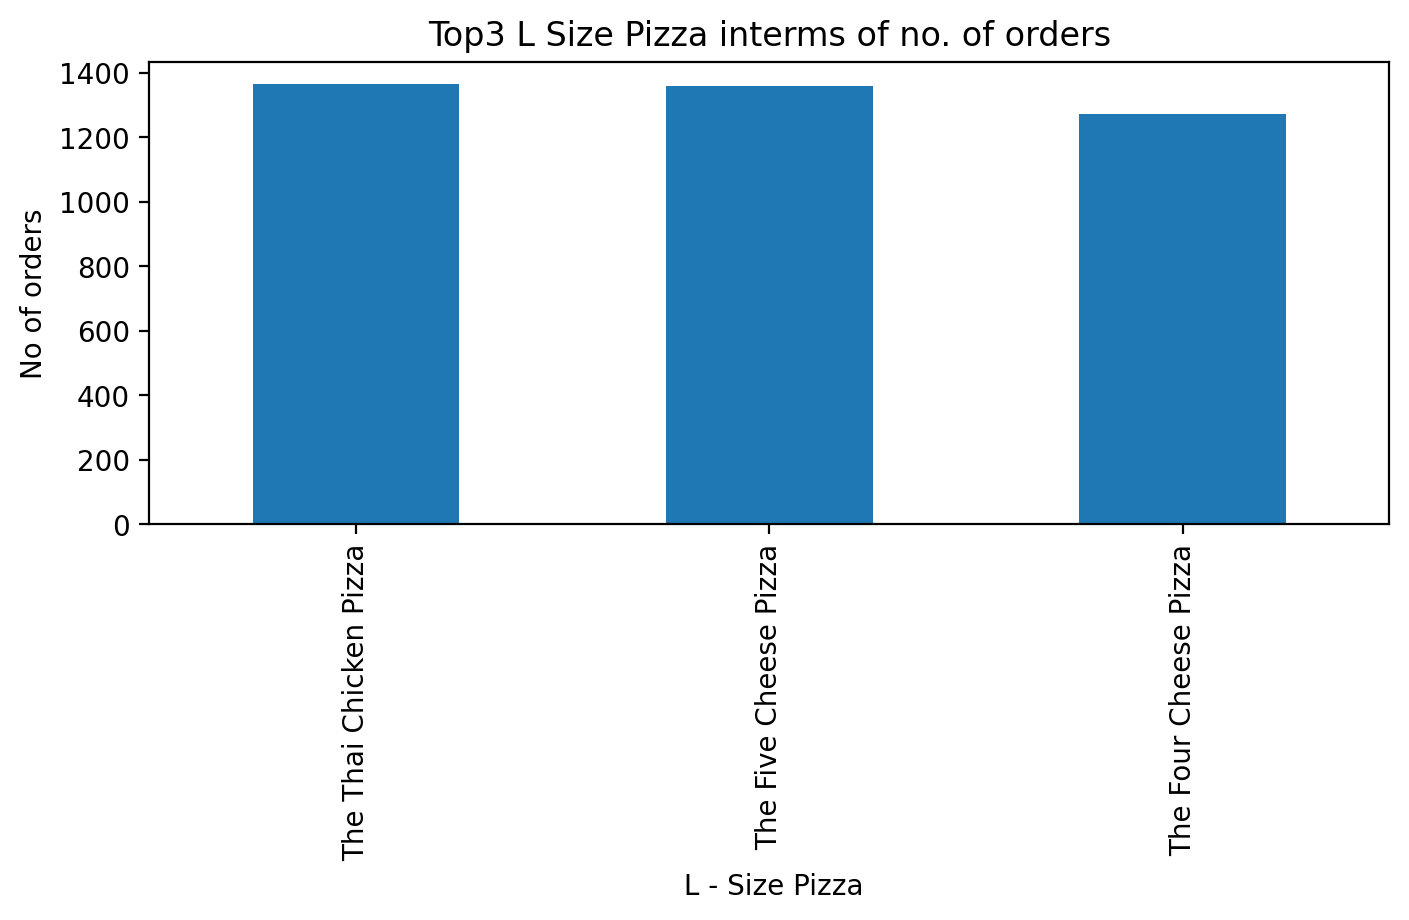

In [ ]:
#Top3 'L' Size Pizza interms of no. of orders

plt.figure(figsize=(8,3), dpi = 200)
df[df['pizza_size'] == 'L']['pizza_name'].value_counts()[:3].plot(kind='bar')
plt.xlabel(" L - Size Pizza")
plt.ylabel("No of orders")
plt.title("Top3 L Size Pizza interms of no. of orders")
plt.show();

In [ ]:
df[df['pizza_size'] == 'L']['pizza_name'].value_counts()[:3]

The Thai Chicken Pizza    1365
The Five Cheese Pizza     1359
The Four Cheese Pizza     1273
Name: pizza_name, dtype: int64

In [ ]:
#no of pizza sold in 'L' category
len(df[df['pizza_size']=='L']['pizza_name'].value_counts())

30

'The Thai Chicken Pizza' is the most ordered pizza in 'L' category and there '30' different type of pizzas sold in 'L' category.

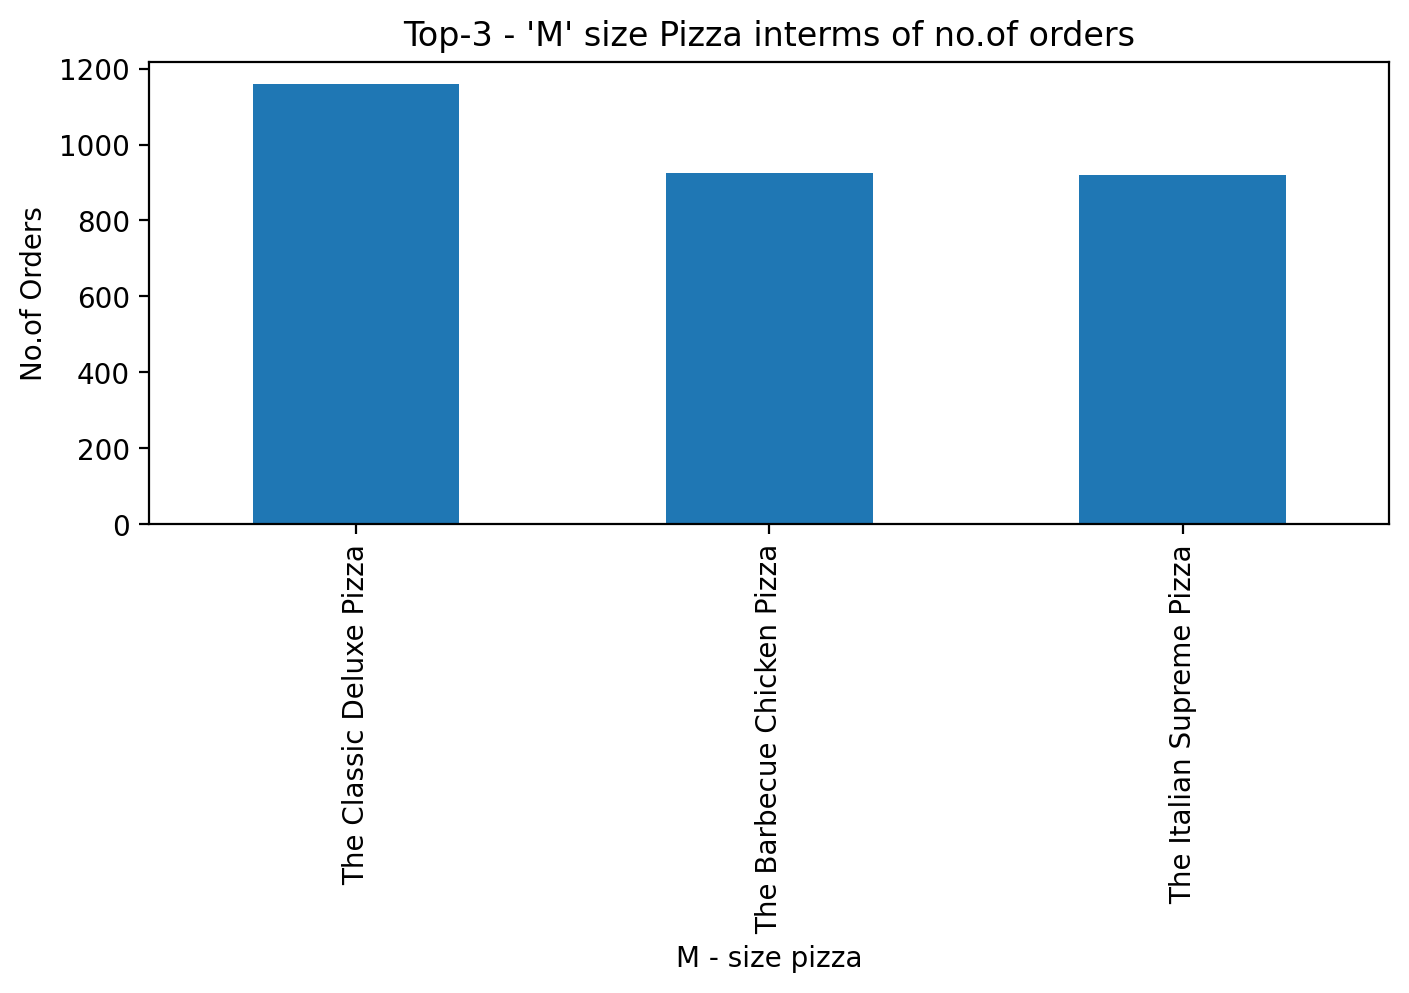

In [ ]:
# Top-3 - 'M' size Pizza interms of no.of orders

plt.figure(figsize=(8,3),dpi=200)
df[df['pizza_size']=='M']['pizza_name'].value_counts()[:3].plot(kind='bar')
plt.xlabel("M - size pizza")
plt.ylabel("No.of Orders")
plt.title("Top-3 - 'M' size Pizza interms of no.of orders")
plt.show();

In [ ]:
# Top-1 - 'M' size Pizza interms of no.of orders
df[df['pizza_size']=='M']['pizza_name'].value_counts()[:3]

The Classic Deluxe Pizza      1159
The Barbecue Chicken Pizza     926
The Italian Supreme Pizza      920
Name: pizza_name, dtype: int64

In [ ]:
# Nof.of Pizzas sold in 'M' category
len(df[df['pizza_size']=='M']['pizza_name'].value_counts())

29

'The Classic Deluxe Pizza' is the most ordered pizza in 'M' category and there '29' different type of pizzas sold in 'M' category.